## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

import matplotlib.pyplot as plt 
import seaborn as sns

## 데이터 경로 설정

In [3]:
os.chdir('C:\\Users\\student\\Downloads\\Regression_Practice')
os.listdir()

['.ipynb_checkpoints',
 '01.LinearRegression.ipynb',
 '02.LogisticRegression.ipynb',
 'Train.csv',
 'Valid.csv']

In [4]:
df = pd.read_csv('Train.csv')
print(df.head())

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       0.0          0         0       4   2   2           0   73
1        0       1.2          1         0       4   2   2           1   73
2        1       1.8          1         0       4   1   2           0   53
3        0       0.0          1         0       4   2   2           0   57
4        1      52.0          1         1       6   4   3           0   65


In [5]:
np.log(3)

1.0986122886681098

## Univariate analysis (변수 개별 Logit모델 분석)

In [6]:
Label = df['Relapse']

In [7]:
Vari, Coef, Pval = [], [], []

for Feature in df.columns[1:]:
    InputFeature = df[Feature]
    InputFeature = sm.add_constant(InputFeature)
    model = sm.Logit(Label, InputFeature).fit()
    
    Vari.append(Feature)
    Coef.append(model.params[1])
    Pval.append(model.pvalues[1])

Optimization terminated successfully.
         Current function value: 0.657710
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.658618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658792
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.663902
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678993
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659464
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.672174
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680586
         Iterations 4


In [8]:
pd.DataFrame({
    'Feature': Vari,
    'Coefficient': Coef,
    'p-value': Pval
})

,Feature,Coefficient,p-value
0,CEA_Post,0.023627,0.016328
1,Lymphatic,0.947041,0.000057
2,Vascular,0.856354,0.000043
3,pStage,0.341326,0.000456
4,pT,0.093594,0.263822
5,pN,0.535324,0.000064
6,Perineural,0.820546,0.011187
7,Age,-0.000291,0.977918


In [9]:
InputFeature = df[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'pN', 'Perineural']]
InputFeature = sm.add_constant(InputFeature)
Model = sm.Logit(Label, InputFeature).fit()

Optimization terminated successfully.
         Current function value: 0.617586
         Iterations 8


In [10]:
print(Model.summary())

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.09257
Time:                        17:23:51   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 6.222e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1139      0.467     -4.524      0.000      -3.030      -1.198
CEA_Post       0.0191      0.009      2.141      0.032       0.002       0.037
Lymphatic      0.6452      0.260      2.483      0.0

In [11]:
CorrlationMatrix = InputFeature.iloc[:, 1:].corr()
CorrlationMatrix

,CEA_Post,Lymphatic,Vascular,pStage,pN,Perineural
CEA_Post,1.000000,0.069175,0.056759,0.121155,0.165132,0.201012
Lymphatic,0.069175,1.000000,0.228239,0.199909,0.319781,0.160543
Vascular,0.056759,0.228239,1.000000,0.129301,0.182302,0.250198
pStage,0.121155,0.199909,0.129301,1.000000,0.770096,0.023054
pN,0.165132,0.319781,0.182302,0.770096,1.000000,0.055978
Perineural,0.201012,0.160543,0.250198,0.023054,0.055978,1.000000


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:>

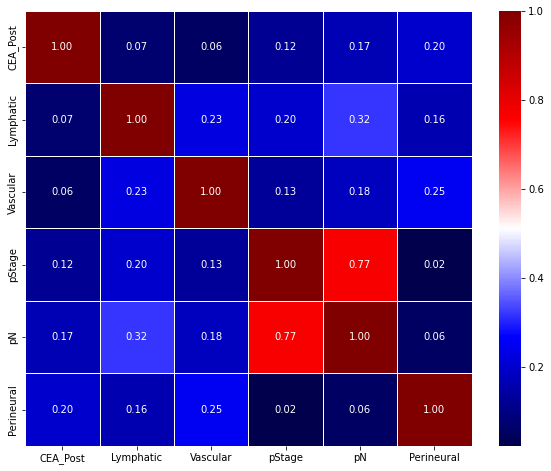

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data = CorrlationMatrix, annot=True, fmt = '.2f', linewidths=.5, cmap='seismic')

In [22]:
InputFeature = df[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'Perineural']]
InputFeature = sm.add_constant(InputFeature)
Model = sm.Logit(Label, InputFeature).fit()

Optimization terminated successfully.
         Current function value: 0.617841
         Iterations 8


In [23]:
print(Model.summary())

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.09219
Time:                        17:36:37   Log-Likelihood:                -242.19
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 2.027e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1599      0.458     -4.721      0.000      -3.057      -1.263
CEA_Post       0.0195      0.009      2.186      0.029       0.002       0.037
Lymphatic      0.6753      0.251      2.689      0.0

In [24]:
pd.DataFrame({
    'Coefficient': Model.params,
    'OddsRatio': np.exp(Model.params),
    'P-value': Model.pvalues
})

,Coefficient,OddsRatio,P-value
const,-2.159906,0.115336,0.000002
CEA_Post,0.019506,1.019697,0.028841
Lymphatic,0.675275,1.964573,0.007175
Vascular,0.622445,1.863479,0.006001
pStage,0.210626,1.234451,0.038192
Perineural,0.330431,1.391568,0.352669


## Validation 데이터 분석

In [17]:
Valid = pd.read_csv('Valid.csv')
print(Valid.head())

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       1.2          1         0       5   1   3           0   42
1        1       1.0          1         0       4   2   2           0   45
2        1       9.2          1         0       6   4   3           0   69
3        1       0.0          0         0       5   5   1           0   64
4        0       2.3          1         1       5   1   3           0   72


## Logistic regression 모델 fitting

In [18]:
ValidFeatures = Valid[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'Perineural']]
ValidFeatures = sm.add_constant(ValidFeatures)

In [19]:
ValidLabel = Valid['Relapse']
ValidPred = Model.predict(ValidFeatures)

In [20]:
from sklearn import metrics

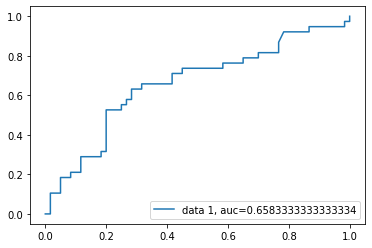

In [21]:
fpr, tpr, _ = metrics.roc_curve(ValidLabel,  ValidPred)
auc = metrics.roc_auc_score(ValidLabel, ValidPred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()